# Image Basic Operation


### Read in(Gray or Color) / Show out

In [1]:
import cv2
import random 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Gray image 读取灰度图 （参数为0）
# 参数为1则读入彩色图片，忽略透明度，参数为-1则读入彩色图片，并保持透明度信息
img_gray = cv2.imread("/Users/ruixiao/Downloads/test.jpg", 0) 
img = cv2.imread("/Users/ruixiao/Downloads/test.jpg", 1) 

In [3]:
cv2.imshow('img_gray', img_gray)
cv2.imwrite('img_gray.jpg', img_gray)
cv2.imshow('img', img)
cv2.imwrite('img.jpg', img)

key = cv2.waitKey(25)  # 25ms后自动关闭图片
cv2.destroyAllWindows()


### Print out a image

In [4]:
print(img_gray)     # 灰度图单通道 

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [235 234 232 ... 239 240 241]
 [236 236 235 ... 241 241 241]
 [237 238 239 ... 242 242 241]]


In [5]:
print(img)          # 彩色图像三通道

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[219 231 249]
  [220 230 248]
  [218 228 245]
  ...
  [230 236 247]
  [231 237 248]
  [232 238 249]]

 [[220 232 250]
  [222 232 249]
  [221 231 248]
  ...
  [232 238 249]
  [232 238 249]
  [232 238 249]]

 [[221 234 250]
  [224 234 251]
  [225 236 250]
  ...
  [233 239 250]
  [233 239 250]
  [232 238 249]]]



### Image data type / shape / crop

In [6]:
print(img_gray.dtype)  # uint8 即 unsigned (无符号) 八位int，2的八次方即255

uint8


In [7]:
print(img_gray.shape)

(600, 600)


In [8]:
print(img.shape)

(600, 600, 3)


In [9]:
img_crop = img_gray[0:100,0:200]
cv2.imshow('img_crop', img_crop)
cv2.imwrite('img_crop.jpg', img_crop)
key = cv2.waitKey(25)
cv2.destroyAllWindows()

In [10]:
print(img_crop.shape)

(100, 200)



### Color Split 

In [11]:
# 把三通道分开，opencv读图顺序是BGR
B, G, R = cv2.split(img)
cv2.imshow('B', B)
cv2.imshow('G', G)
cv2.imshow('R', R)
key = cv2.waitKey(25)
cv2.destroyAllWindows()


### Change color（Assignment）

In [12]:
# 随机改变图片颜色
def random_light_color(img):
    B,G,R = cv2.split(img)
    
    b_rand = random.randint(-50,50)   # 随机生成-50到50的随机整数
    
    #目的：让B，G，R的值维持在0-255之内
    if b_rand == 0:
        pass
    elif b_rand > 0:
        lim = 255 - b_rand
        B[B > lim] = 255
        B[B <= lim] = (b_rand + B[B <= lim]).astype(img_gray.dtype)    # astype：让现在的数据类型等于img的数据类型
    elif b_rand < 0:
        lim = 0 - b_rand
        B[B < lim] = 0
        B[B >= lim] = (b_rand + B[B >= lim]).astype(img_gray.dtype)  
    
    g_rand = random.randint(-50,50)
    if g_rand == 0:
        pass
    elif g_rand > 0:
        lim = 255 - g_rand
        G[G > lim] = 255
        G[G <= lim] = (g_rand + G[G <= lim]).astype(img_gray.dtype)
    elif g_rand < 0:
        lim = 0 - g_rand
        G[G < lim] = 0
        G[G >= lim] = (g_rand + G[G >= lim]).astype(img_gray.dtype)  
    
    r_rand = random.randint(-50,50)
    if r_rand == 0:
        pass
    elif r_rand > 0:
        lim = 255 - r_rand
        R[R > lim] = 255
        R[R <= lim] = (r_rand + R[R <= lim]).astype(img_gray.dtype)
    elif r_rand < 0:
        lim = 0 - r_rand
        R[R < lim] = 0
        R[R >= lim] = (r_rand + R[R >= lim]).astype(img_gray.dtype)  
    
        img_merge = cv2.merge((B,G,R))   # 将三通道融合
        return img_merge

In [13]:
img_random_color = random_light_color(img)
cv2.imshow('img_random',img_random_color)
cv2.imwrite('img_rando.jpg',img_random_color)
key = cv2.waitKey(25)
cv2.destroyAllWindows()


### Gamma Correction

In [14]:
img_dark = cv2.imread("/Users/ruixiao/Downloads/test2.jpg")
cv2.imshow('img_dark', img_dark)
cv2.imwrite('img_dark.jpg', img_dark)
key = cv2.waitKey(25)
cv2.destroyAllWindows()

In [15]:
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = []
    for i in range(256):
        table.append(((i / 255.0) ** invGamma) * 255)
    table = np.array(table).astype('uint8')
    return cv2.LUT(img_dark, table)  # look up table: 做一个table，值直接从table里面找（加速算法）

img_brighter = adjust_gamma(img_dark, 2)
cv2.imshow('img_dark', img_dark)
cv2.imwrite('img_dark.jpg', img_dark)
cv2.imshow('img_brighter', img_brighter)
cv2.imwrite('img_brighter.jpg', img_brighter)
key = cv2.waitKey(25)
cv2.destroyAllWindows()


### Histogram

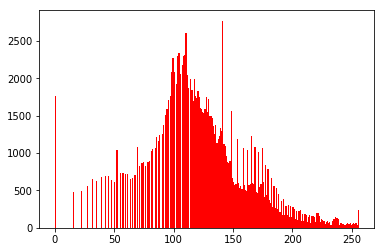

In [16]:
# 均衡化 对于细节更加清晰
img_small_brighter = cv2.resize(img_brighter, (int(img_brighter.shape[0]*0.5), int(img_brighter.shape[1]*0.5)))
plt.hist(img_brighter.flatten(), 256, [0, 256], color = 'r')
img_yuv = cv2.cvtColor(img_small_brighter, cv2.COLOR_BGR2YUV)  # 把BGR转变到YUV 改变了图像空间
# equalize the histogram of the Y channel
img_yuv[ : , : , 0] = cv2.equalizeHist(img_yuv[ : , : , 0])   # 均衡化直方图 only for 1 channel
# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
cv2.imshow('Color input image' , img_small_brighter)
cv2.imwrite('Color input image.jpg' , img_small_brighter)
cv2.imshow('Histogram equalized', img_output)
key = cv2.waitKey(25)
cv2.destroyAllWindows()